Introduction: Unveiling Revenue Attribution in Marketing Channels

In this interview task, the objective is to explore revenue attribution within diverse marketing channels. The challenge lies in attributing revenue to channels in the absence of direct revenue data, necessitating the use of touchpoint counts and a standardized revenue assumption. This approach aims to unravel the impact of each channel on revenue generation, yet poses questions about its precision and comprehensive insights. The task involves dissecting the strengths and limitations of this methodology, aiming to derive actionable insights while recognizing the need for more refined attribution models. Join in to navigate the complexities of channel attribution, exploring avenues for improved precision in gauging their true contributions to business revenue.

# Python Libraries & Data Import

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [166]:
# Code where you want to suppress warnings
warnings.filterwarnings("ignore")

In [167]:
# Path to your CSV file
file_path = 'Customerattributiondata.csv'

This line of code will import the CSV file into python.

In [168]:
# Read the file as a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Process lines to split by tabs and create a DataFrame
data = []
for line in lines:
    columns = line.strip().split('\t')  # Split each line by tabs
    data.append(columns)

# Create a DataFrame from the processed data
df = pd.DataFrame(data)

the previous code will read the CSV file and will organize it inside a python dataframe. we applied the function split and specified that the data is splitted by a tabulation.

In [169]:
df

,0,1,2,3,4
0,"""CUSTOMERID",SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,"REVENUE"""
1,"""955200d89b1a4cb0",f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,""""
2,"""e4067a9e62ec1936",d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,""""
3,"""8a48e8219b6c1a29",c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,""""
4,"""ef2206d490330882",b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,""""
...,...,...,...,...,...
13300,"""d0d146c631efb84f",87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,""""
13301,"""99467aa6cbe3f430",e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,""""
13302,"""0ae5f29809695ec5",17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,""""
13303,"""3bb38a0777496b70",cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,""""


the previous code will show us the initial dataframe imported from the CSV file.

# Data Cleaning

In [170]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains string data
    if df[column].dtype == 'object':
        # Remove double quotes from string columns
        df[column] = df[column].str.replace('"', '')

this code will allow us to clean the data and remove unacessary annotations which arethe quotes in the columns CUSTOMERID and REVENUE

In [171]:
df

,0,1,2,3,4
0,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
1,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,
2,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,
3,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,
4,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,
...,...,...,...,...,...
13300,d0d146c631efb84f,87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,
13301,99467aa6cbe3f430,e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,
13302,0ae5f29809695ec5,17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,
13303,3bb38a0777496b70,cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,


In [172]:
# Set the DataFrame's index using the values from the first column
df.columns = df.iloc[0]  # Set first row values as column names
df = df.iloc[1:]  # Remove the first row (used as column names)

# Set the DataFrame index using the row numbers
df.reset_index(drop=True, inplace=True)  # Reset the index to default row numbers

the previous code will allow us to place the column names as the header of our dataframe.

In [173]:
df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,
...,...,...,...,...,...
13299,d0d146c631efb84f,87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,
13300,99467aa6cbe3f430,e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,
13301,0ae5f29809695ec5,17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,
13302,3bb38a0777496b70,cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,


In [174]:
# Display the columns of the DataFrame
print(df.columns)

Index(['CUSTOMERID', 'SESSIONID', 'TIMESTAMP_TOUCHPOINT', 'MARKETINGCHANNEL',
       'REVENUE'],
      dtype='object', name=0)


As displayed in the previous cell, we have 5 columns in the dataframe which are 'CUSTOMERID', 'SESSIONID', 'TIMESTAMP_TOUCHPOINT', 'MARKETINGCHANNEL' and 'REVENUE'.

In [175]:
# Convert columns to the desired data types
df['CUSTOMERID'] = df['CUSTOMERID'].astype(str)
df['SESSIONID'] = df['SESSIONID'].astype(str)
df['TIMESTAMP_TOUCHPOINT'] = df['TIMESTAMP_TOUCHPOINT'].astype(str)
df['MARKETINGCHANNEL'] = df['MARKETINGCHANNEL'].astype(str)
# Replace empty strings or non-numeric values in 'REVENUE' column with NaN
df['REVENUE'] = pd.to_numeric(df['REVENUE'], errors='coerce')

# Convert NaN values to 0 or any other suitable value if needed
df['REVENUE'].fillna(0, inplace=True)

# Convert 'REVENUE' column to integers
df['REVENUE'] = df['REVENUE'].astype(int)

# Now, the 'REVENUE' column contains integers, handling empty strings or non-integer values as 0

# Now, 'CUSTOMERID', 'SESSIONID', 'TIMESTAMP_TOUCHPOINT', and 'MARKETINGCHANNEL' are strings,
# and 'REVENUE' is an integer column in the DataFrame


The previous code will allow us to cast each column into specific type instead of object to make data manipulation doable.
Also we affected 0 to empty REVENUE rows.

In [176]:
df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,0
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,0
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,0
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,0
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,0
...,...,...,...,...,...
13299,d0d146c631efb84f,87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,0
13300,99467aa6cbe3f430,e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,0
13301,0ae5f29809695ec5,17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,0
13302,3bb38a0777496b70,cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,0


# Initial Data Analysis

In [177]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows, if any
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)


Duplicate rows found:
0         CUSTOMERID SESSIONID TIMESTAMP_TOUCHPOINT MARKETINGCHANNEL  REVENUE
247    SEA_NON-BRAND                           None             None        0
387    SEA_NON-BRAND                           None             None        0
399    SEA_NON-BRAND                           None             None        0
439    SEA_NON-BRAND                           None             None        0
530    SEA_NON-BRAND                           None             None        0
...              ...       ...                  ...              ...      ...
13090  SEA_NON-BRAND                           None             None        0
13186  SEA_NON-BRAND                           None             None        0
13191  SEA_NON-BRAND                           None             None        0
13209  SEA_NON-BRAND                           None             None        0
13253  SEA_NON-BRAND                           None             None        0

[143 rows x 5 columns]


The previous code shows us that there are no duplicate lines in the dataframe.
Each row is unique that correspons to a unique touchpoint.

In [178]:
# Check for duplicated values in the 'CUSTOMERID' column
duplicates = df[df.duplicated(subset=['CUSTOMERID'], keep=False)]

if duplicates.empty:
    print("No duplicates found in 'CUSTOMERID' column.")
else:
    print("Duplicates found in 'CUSTOMERID' column:")
    print(duplicates['CUSTOMERID'])


Duplicates found in 'CUSTOMERID' column:
2        8a48e8219b6c1a29
12       ea2972729dab5cfa
17       cf63982f41d144e4
22       03a71ec21983349f
28       be28eebc0f18db61
               ...       
13292    8f8f3ed5899914c4
13293    26998407d7867f8a
13295    2b3280f1c53f76e6
13298    bc0cd31ab6df4170
13303    7d122ad4fd345cfb
Name: CUSTOMERID, Length: 4875, dtype: object


The previous code will allow us to check if there are duplicates in the column CUSTOMERID.

In [179]:
# Assuming 'df' is your DataFrame and 'CUSTOMERID' is the column with potential duplicates
duplicate_counts = df['CUSTOMERID'].value_counts()

# Display the count of duplicates for each 'CUSTOMERID'
print(duplicate_counts)


SEA_NON-BRAND       145
ae397ecdeb9f9327     38
bb12f2e2d24e473a     35
dbdf49cdc48e08cc     34
a2df14a5bdb8c398     24
                   ... 
4bc39d59a9020417      1
307bd9829fc3c1ee      1
2d8359a61a4eea3d      1
6747288321b3ead7      1
3bb38a0777496b70      1
Name: CUSTOMERID, Length: 10001, dtype: int64


The previous code will do a grouping where it shows the the number of duplicates for the column CUSTOMERID.
In some cases we can see that the same CUSTOMERID is repeated over 20 times.
We also see an anomaly within the data where there is a CUSTOMERID corresponding to SEA_NON-BRAND.
After doing a check on the CSV file, we find some corrupt lines where the data is written in two lines instead of one.

In [180]:
rows_to_delete = df[df['CUSTOMERID'] == 'SEA_NON-BRAND']

for index, row in rows_to_delete.iterrows():
    if index > 0:
        # Modify 'MARKETINGCHANNEL' of the previous row to 'Adwords/SEA_NON-BRAND'
        df.at[index - 1, 'MARKETINGCHANNEL'] = 'Adwords/SEA_NON-BRAND'
        # Replace the 'REVENUE' value of the previous row with 'SESSIONID' value of the current row
        df.at[index - 1, 'REVENUE'] = row['SESSIONID']

# Drop rows where 'CUSTOMERID' is 'SEA_NON-BRAND'
df.drop(rows_to_delete.index, inplace=True)

# Replace empty strings or non-numeric values in 'REVENUE' column with NaN
df['REVENUE'] = pd.to_numeric(df['REVENUE'], errors='coerce')

# Convert NaN values to 0 or any other suitable value if needed
df['REVENUE'].fillna(0, inplace=True)

# Convert 'REVENUE' column to integers
df['REVENUE'] = df['REVENUE'].astype(int)

# Now df contains the DataFrame after the necessary changes and deletion




The code in the previous cell will allow us to fix the anomaly by deleting the extra lines and applying the correct value to both the affected columns which are MARKETINGCHANNEL ('Adwords/SEA_NON-BRAND') and REVENUE.

In [181]:
total_duplicates = df.duplicated(subset=['CUSTOMERID']).sum()

# Display the total count of duplicates in the 'CUSTOMERID' column
print("Total count of duplicates in 'CUSTOMERID' column:", total_duplicates)


Total count of duplicates in 'CUSTOMERID' column: 3159


The number of duplicates in the column CUSTOMERID is 3303 out of 13303.
This means that there are customers who did multiple touchpoints.

In [182]:
unique_customer_count = df['CUSTOMERID'].nunique()

# Display the count of unique 'CUSTOMERID' values
print("Number of unique 'CUSTOMERID' values:", unique_customer_count)


Number of unique 'CUSTOMERID' values: 10000


The previous code shows us the number of unique customers : we have 10000 customers.

In [183]:
session_duplicates_count = df.duplicated(subset=['SESSIONID']).sum()

# Display the count of duplicates in the 'SESSIONID' column
print("Total count of duplicates in 'SESSIONID' column:", session_duplicates_count)


Total count of duplicates in 'SESSIONID' column: 0


The previous code shows us that there are no duplicates in the column SESSIONID. (which makes sense)

In [184]:
unique_marketing_channels = df['MARKETINGCHANNEL'].unique()

# Display all unique values in the 'MARKETINGCHANNEL' column
print("Unique values in 'MARKETINGCHANNEL' column:", unique_marketing_channels)

Unique values in 'MARKETINGCHANNEL' column: ['Direct_NON-BRAND' 'SEO_BRAND' 'Referral' 'SEO_NON-BRAND'
 'Adwords/SEA_NON-BRAND' 'Social Media organic_NON-BRAND'
 'Referral_NON-BRAND']


The previous code shows us all the possible Marketing channels.
We have 7 channels in total.

In [185]:
channel_counts = df['MARKETINGCHANNEL'].value_counts()

# Display the count of each unique value in the 'MARKETINGCHANNEL' column
print("Count of each unique value in 'MARKETINGCHANNEL' column:")
print(channel_counts)


Count of each unique value in 'MARKETINGCHANNEL' column:
Direct_NON-BRAND                  5261
SEO_BRAND                         4145
Referral                          2114
SEO_NON-BRAND                     1486
Adwords/SEA_NON-BRAND              145
Referral_NON-BRAND                   7
Social Media organic_NON-BRAND       1
Name: MARKETINGCHANNEL, dtype: int64


The previous code show us a grouping for the number of touchpoints for each channel.

In [186]:
df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,0
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,0
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,0
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,0
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,0
...,...,...,...,...,...
13299,d0d146c631efb84f,87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,0
13300,99467aa6cbe3f430,e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,0
13301,0ae5f29809695ec5,17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,0
13302,3bb38a0777496b70,cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,0


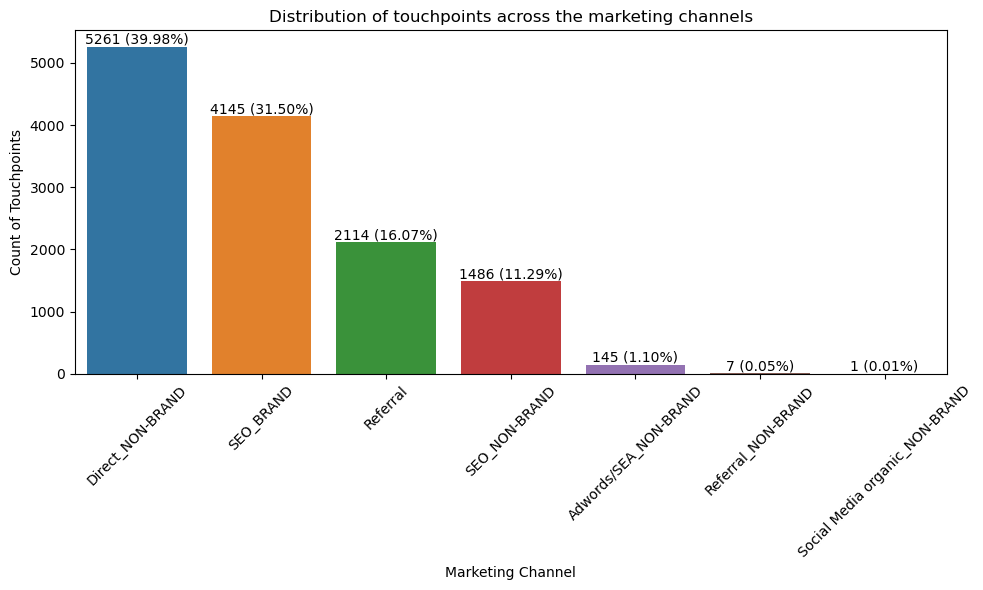

In [187]:
# Count occurrences of each unique value in 'MARKETINGCHANNEL' column
channel_counts = df['MARKETINGCHANNEL'].value_counts()

# Calculate percentage for each value
total_count = len(df['MARKETINGCHANNEL'])
channel_percentage = (channel_counts / total_count) * 100

# Create a count plot for 'MARKETINGCHANNEL' column with count values and percentages displayed on bars
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.xlabel('Marketing Channel')
plt.ylabel('Count of Touchpoints')
plt.title('Distribution of touchpoints across the marketing channels')

# Display count values and percentages on top of the bars
for i, (count, percent) in enumerate(zip(channel_counts, channel_percentage)):
    plt.text(i, count + 0.2, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The previous visualization shows us the distribution of all the touchpoints across all the marketing channels.
We have Direct_NON-Brand in the first position with 5261 touchpoint which is about 40% of all the touchdowns.
We have SEO_BRAND in the second position with 4154 touchdowns (about 30%).
We have also Referral and SEO_NON-BRAND with 2114 and 1486 touchdowns respectively.
For the rest of the channels we see meager values of approximate 1% and less.

# Touchpoints With Revenue & Touchpoints Without Revenue

In [188]:
df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,0
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,0
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,0
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,0
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,0
...,...,...,...,...,...
13299,d0d146c631efb84f,87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,0
13300,99467aa6cbe3f430,e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,0
13301,0ae5f29809695ec5,17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,0
13302,3bb38a0777496b70,cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,0


In [189]:
# Convert NaN values to 0 or any other suitable value if needed
df['REVENUE'].fillna(0, inplace=True)

We are going to delete the column Hour since we don't need it anymore.
We are going to keep the column TimeCategory.
We will need it for further data analysis.

In [190]:
df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,0
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,0
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,0
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,0
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,0
...,...,...,...,...,...
13299,d0d146c631efb84f,87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,0
13300,99467aa6cbe3f430,e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,0
13301,0ae5f29809695ec5,17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,0
13302,3bb38a0777496b70,cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,0


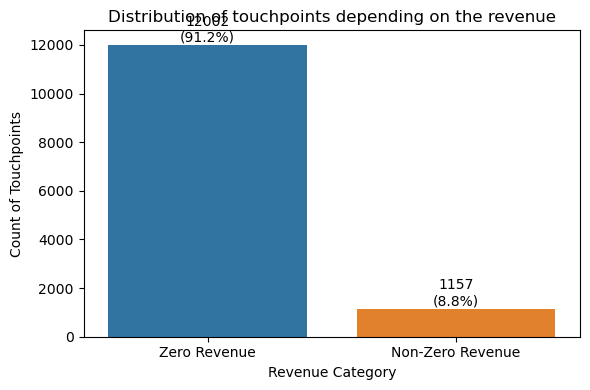

In [191]:
# Categorize rows based on revenue
df['RevenueCategory'] = df['REVENUE'].apply(lambda x: 'Zero Revenue' if x == 0 else 'Non-Zero Revenue')

# Count occurrences of each revenue category
revenue_counts = df['RevenueCategory'].value_counts()
total_rows = len(df)  # Total number of rows

# Calculate percentages
revenue_percentages = (revenue_counts / total_rows) * 100

# Plot a bar chart for rows with 0 revenue and others with revenue
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=revenue_counts.index, y=revenue_counts.values)
plt.xlabel('Revenue Category')
plt.ylabel('Count of Touchpoints')
plt.title('Distribution of touchpoints depending on the revenue')

# Display count and percentage values on top of the bars
for i, (count, percent) in enumerate(zip(revenue_counts, revenue_percentages)):
    ax.text(i, count + 0.2, f"{count}\n({percent:.1f}%)", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Depending on the previous graph, we can see that 91.3% of the touchpoints doesn't generate revenue.
onlt 9.8% (1287 touchpoints generated revenue).

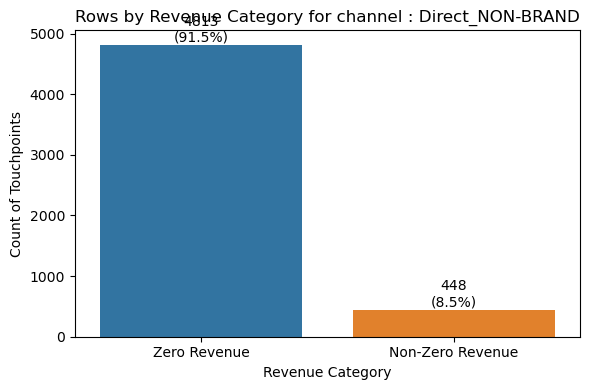

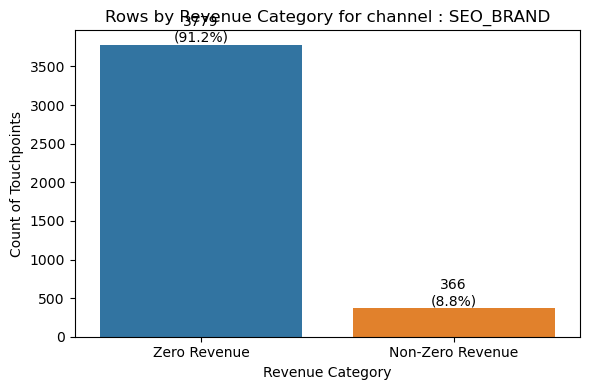

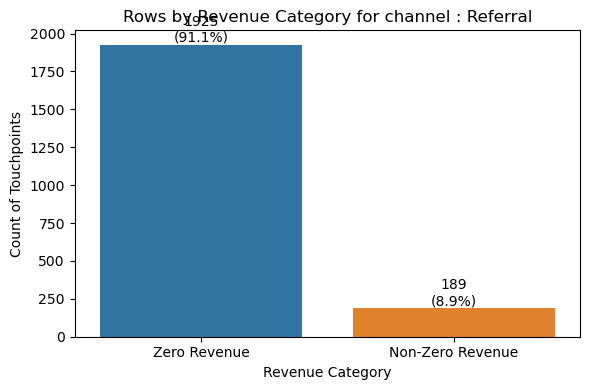

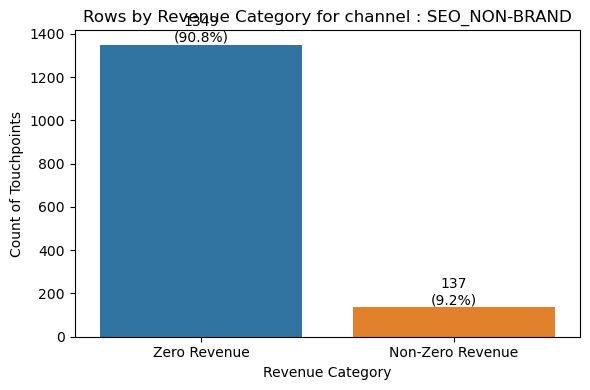

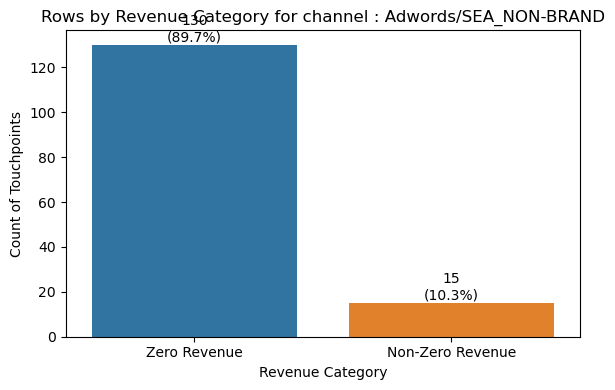

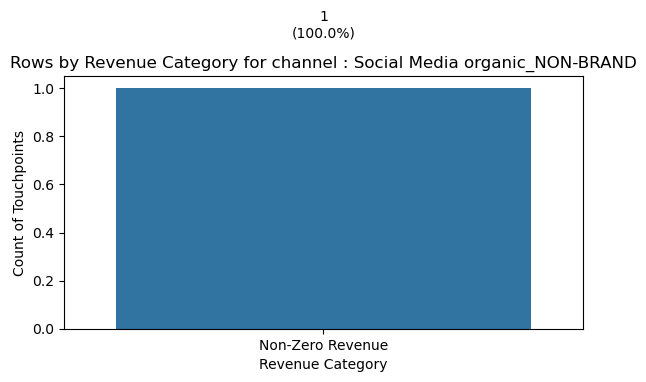

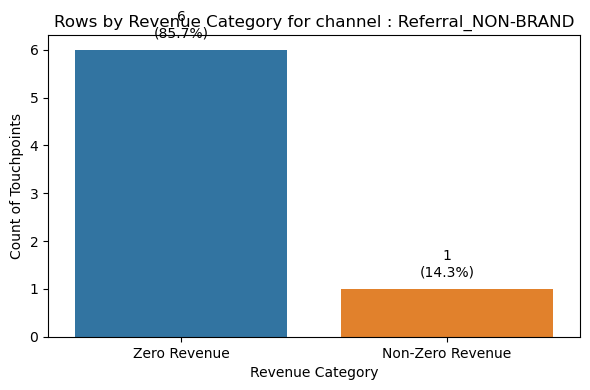

In [192]:
# Get unique marketing channels
unique_channels = df['MARKETINGCHANNEL'].unique()

# Plot for each marketing channel
for channel in unique_channels:
    # Filter the DataFrame for the current channel
    channel_data = df[df['MARKETINGCHANNEL'] == channel]
    
    # Categorize rows based on revenue
    channel_data['RevenueCategory'] = channel_data['REVENUE'].apply(lambda x: 'Zero Revenue' if x == 0 else 'Non-Zero Revenue')
    
    # Count occurrences of each revenue category
    revenue_counts = channel_data['RevenueCategory'].value_counts()
    total_rows = len(channel_data)  # Total number of rows for the channel
    
    # Calculate percentages
    revenue_percentages = (revenue_counts / total_rows) * 100
    
    # Plot for the current marketing channel
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=revenue_counts.index, y=revenue_counts.values)
    plt.xlabel('Revenue Category')
    plt.ylabel('Count of Touchpoints')
    plt.title(f'Rows by Revenue Category for channel : {channel}')
    
    # Display count and percentage values on top of the bars
    for i, (count, percent) in enumerate(zip(revenue_counts, revenue_percentages)):
        ax.text(i, count + 0.2, f"{count}\n({percent:.1f}%)", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

Depending on the previous graphs, we can see that the touchpoints that corresponds to a Non-Zero Revenue varies between 8.5% and 14.3% for each Marketing channel with the exception of the channel Social Media Organic_Non-Brand that has 100% touchpoints with Non-Zero Revenue since that channel scored a single touchdown. 

# Revenue Distrubution

In the next part of this analysis, we will consider only the touchpoints that generated revenue.

In [193]:
# Create a new DataFrame with rows having 'REVENUE' greater than 0 and assign it to 'revenue_df'
revenue_df = df[df['REVENUE'] > 0].copy()

In [194]:
revenue_df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE,RevenueCategory
1783,f0f6f093274df6c7,9ea6ecf003beb7fe5ac1e6fc80cf30abea807ae7,2019-12-05 18:49:57,Referral,1000,Non-Zero Revenue
1784,295d74644dc9507f,4703d11b2f26dfe7cabf833dbf7076fedb320690,2020-01-10 12:17:40,SEO_BRAND,1000,Non-Zero Revenue
1785,e6d7cbf2d43741db,7a2803d08d68414e7eb36b55f74a60d8246edfb4,2019-11-22 09:57:56,SEO_NON-BRAND,1000,Non-Zero Revenue
1786,18f0dc9165b515ae,f0071b6c21e4d0228c26a40bda312dd5ec084f05,2019-12-01 14:30:23,Direct_NON-BRAND,1000,Non-Zero Revenue
1787,53b300b2a202bd74,c147df619477656c4d9e662b13ee91244c500409,2019-12-26 20:44:30,SEO_NON-BRAND,1000,Non-Zero Revenue
...,...,...,...,...,...,...
5019,2afeb33f032d1fbb,93f145d28b3b216eeaf2a55ae63accf00aabba48,2019-12-02 14:38:28,Direct_NON-BRAND,1000,Non-Zero Revenue
5020,35a9351a6fccbf0e,54ef8f6f8e5e8163d83ddb1c0bd2a6309f09e85b,2019-12-16 11:53:49,SEO_BRAND,1000,Non-Zero Revenue
5021,cb360e9270d53475,150b45bce7506da7512f46a961bc3229f35518db,2019-12-27 11:43:14,SEO_BRAND,1000,Non-Zero Revenue
5022,271b10a12e8b77e5,7028447459c49fb7ed23f3d6c654c20b255042f5,2019-12-29 14:31:14,SEO_BRAND,1000,Non-Zero Revenue


As shown above, the new dataframe contains 1175 rows which corresponds to the 8.8% of the original dataframe as shown in a previous visualization.

In [195]:
# Reset the row numbers in the 'revenue_df' DataFrame
revenue_df.reset_index(drop=True, inplace=True)

In [196]:
revenue_df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE,RevenueCategory
0,f0f6f093274df6c7,9ea6ecf003beb7fe5ac1e6fc80cf30abea807ae7,2019-12-05 18:49:57,Referral,1000,Non-Zero Revenue
1,295d74644dc9507f,4703d11b2f26dfe7cabf833dbf7076fedb320690,2020-01-10 12:17:40,SEO_BRAND,1000,Non-Zero Revenue
2,e6d7cbf2d43741db,7a2803d08d68414e7eb36b55f74a60d8246edfb4,2019-11-22 09:57:56,SEO_NON-BRAND,1000,Non-Zero Revenue
3,18f0dc9165b515ae,f0071b6c21e4d0228c26a40bda312dd5ec084f05,2019-12-01 14:30:23,Direct_NON-BRAND,1000,Non-Zero Revenue
4,53b300b2a202bd74,c147df619477656c4d9e662b13ee91244c500409,2019-12-26 20:44:30,SEO_NON-BRAND,1000,Non-Zero Revenue
...,...,...,...,...,...,...
1152,2afeb33f032d1fbb,93f145d28b3b216eeaf2a55ae63accf00aabba48,2019-12-02 14:38:28,Direct_NON-BRAND,1000,Non-Zero Revenue
1153,35a9351a6fccbf0e,54ef8f6f8e5e8163d83ddb1c0bd2a6309f09e85b,2019-12-16 11:53:49,SEO_BRAND,1000,Non-Zero Revenue
1154,cb360e9270d53475,150b45bce7506da7512f46a961bc3229f35518db,2019-12-27 11:43:14,SEO_BRAND,1000,Non-Zero Revenue
1155,271b10a12e8b77e5,7028447459c49fb7ed23f3d6c654c20b255042f5,2019-12-29 14:31:14,SEO_BRAND,1000,Non-Zero Revenue


We just reseted the index to 0.

In [197]:
# Get all unique values in the 'REVENUE' column
unique_revenue_values = revenue_df['REVENUE'].unique()

# Display all unique values for 'REVENUE'
print(unique_revenue_values)

[1000]


The above code shows us that the Revenue is unitary to all columns and corresponds to the value of a 1000 euro.
So for good practise, we are going to delete that column since it doen't add any new information aobout our data.

In [198]:
# Drop the 'RevenueCategory' column
revenue_df.drop('REVENUE', axis=1, inplace=True)

In [199]:
revenue_df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,RevenueCategory
0,f0f6f093274df6c7,9ea6ecf003beb7fe5ac1e6fc80cf30abea807ae7,2019-12-05 18:49:57,Referral,Non-Zero Revenue
1,295d74644dc9507f,4703d11b2f26dfe7cabf833dbf7076fedb320690,2020-01-10 12:17:40,SEO_BRAND,Non-Zero Revenue
2,e6d7cbf2d43741db,7a2803d08d68414e7eb36b55f74a60d8246edfb4,2019-11-22 09:57:56,SEO_NON-BRAND,Non-Zero Revenue
3,18f0dc9165b515ae,f0071b6c21e4d0228c26a40bda312dd5ec084f05,2019-12-01 14:30:23,Direct_NON-BRAND,Non-Zero Revenue
4,53b300b2a202bd74,c147df619477656c4d9e662b13ee91244c500409,2019-12-26 20:44:30,SEO_NON-BRAND,Non-Zero Revenue
...,...,...,...,...,...
1152,2afeb33f032d1fbb,93f145d28b3b216eeaf2a55ae63accf00aabba48,2019-12-02 14:38:28,Direct_NON-BRAND,Non-Zero Revenue
1153,35a9351a6fccbf0e,54ef8f6f8e5e8163d83ddb1c0bd2a6309f09e85b,2019-12-16 11:53:49,SEO_BRAND,Non-Zero Revenue
1154,cb360e9270d53475,150b45bce7506da7512f46a961bc3229f35518db,2019-12-27 11:43:14,SEO_BRAND,Non-Zero Revenue
1155,271b10a12e8b77e5,7028447459c49fb7ed23f3d6c654c20b255042f5,2019-12-29 14:31:14,SEO_BRAND,Non-Zero Revenue


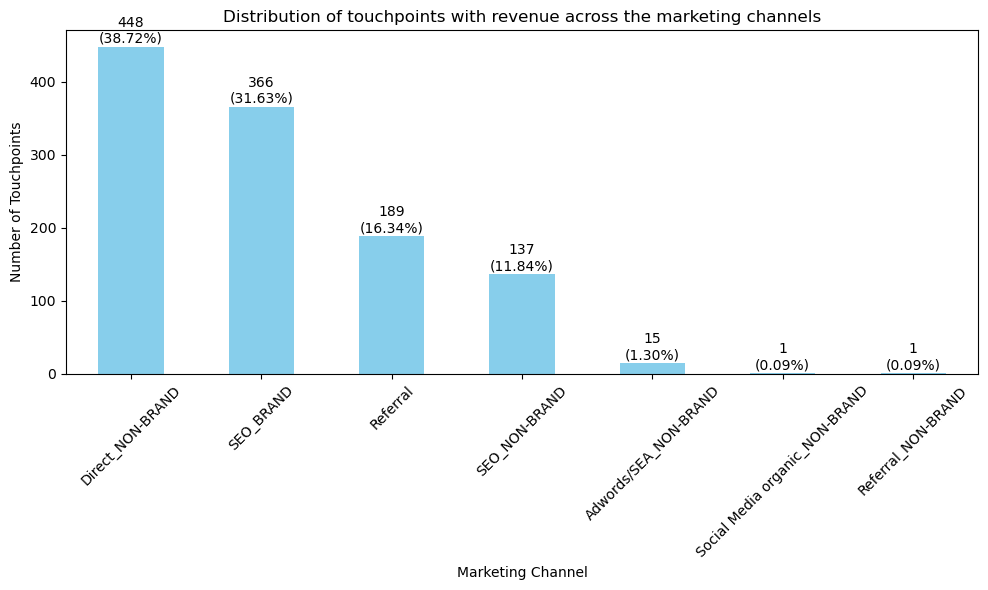

In [200]:
# Calculate the count and percentage of rows per marketing channel
channel_counts = revenue_df['MARKETINGCHANNEL'].value_counts()
channel_percentages = (channel_counts / len(revenue_df)) * 100

# Plotting the number of rows per marketing channel
plt.figure(figsize=(10, 6))
channel_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Touchpoints')
plt.title('Distribution of touchpoints with revenue across the marketing channels')

# Displaying percentages on top of the bars
for i, count in enumerate(channel_counts):
    plt.text(i, count + 1, f"{count}\n({channel_percentages[i]:.2f}%)", ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


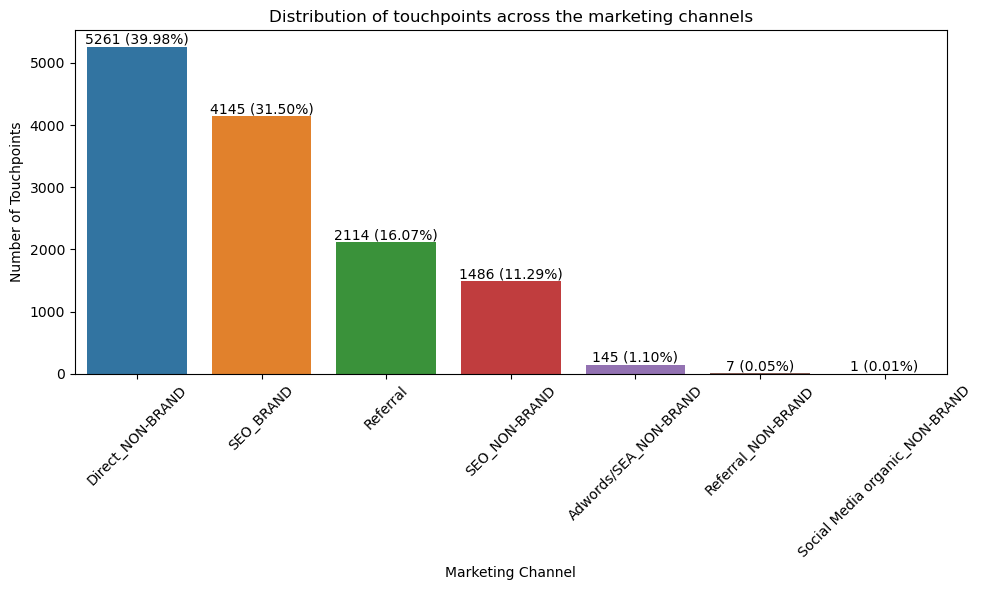

In [201]:
# Count occurrences of each unique value in 'MARKETINGCHANNEL' column
channel_counts = df['MARKETINGCHANNEL'].value_counts()

# Calculate percentage for each value
total_count = len(df['MARKETINGCHANNEL'])
channel_percentage = (channel_counts / total_count) * 100

# Create a count plot for 'MARKETINGCHANNEL' column with count values and percentages displayed on bars
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Touchpoints')
plt.title('Distribution of touchpoints across the marketing channels')

# Display count values and percentages on top of the bars
for i, (count, percent) in enumerate(zip(channel_counts, channel_percentage)):
    plt.text(i, count + 0.2, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Let's consider the two plots above:
The first one represents the distribution of the touchpoints that generated revenue through the marketing channels.
The second one represents the distribution of all touchpoints through the marketing channels that we showed before.
The interesting thing here is that the two plots are closely similar (percentage wise) even though we reduced the size of the original dataframe by more  than 10 times folds.
per example, for the first plot we have for channel Direct_NON-BRAND 38.72% while for the second plot a close 39.98%.
the same for the next channel with 31.63% and 31.50% for the first and second plot respectively.
and so on.
We also can see that the dominance of the marketing channel echelon remains the same between the 2 plots with the slight difference of equality in the second plot for the channels Referral_NON-BRAND and Social Media organic_NON-BRAND. (this is negligable since they both have very few touchpoints)
It is safe to assume that the distribution of touchpoints whether they provide revenue or not follow a certain pattern whether we magnify the analysis on bigger chunks of data or reduce it to a small amount such as the case in this part.


In [202]:
# Assuming 'df' is your DataFrame

# Filter rows where RevenueCategory is Non-Zero Revenue
revenue_touchpoints = df[df['RevenueCategory'] == 'Non-Zero Revenue']

# Calculate the total count of touchpoints with non-zero revenue
total_non_zero_revenue_touchpoints = len(revenue_touchpoints)

# Calculate the count of touchpoints for each marketing channel
marketing_channel_counts = df['MARKETINGCHANNEL'].value_counts()

# Calculate the count of non-zero revenue-generating touchpoints for each marketing channel
non_zero_revenue_by_channel = revenue_touchpoints['MARKETINGCHANNEL'].value_counts()

# Calculate the probability of a touchpoint resulting in non-zero revenue for each marketing channel
probability_non_zero_revenue_by_channel = (non_zero_revenue_by_channel / marketing_channel_counts) * 100

print(probability_non_zero_revenue_by_channel)


Adwords/SEA_NON-BRAND              10.344828
Direct_NON-BRAND                    8.515491
Referral                            8.940397
Referral_NON-BRAND                 14.285714
SEO_BRAND                           8.829916
SEO_NON-BRAND                       9.219381
Social Media organic_NON-BRAND    100.000000
Name: MARKETINGCHANNEL, dtype: float64


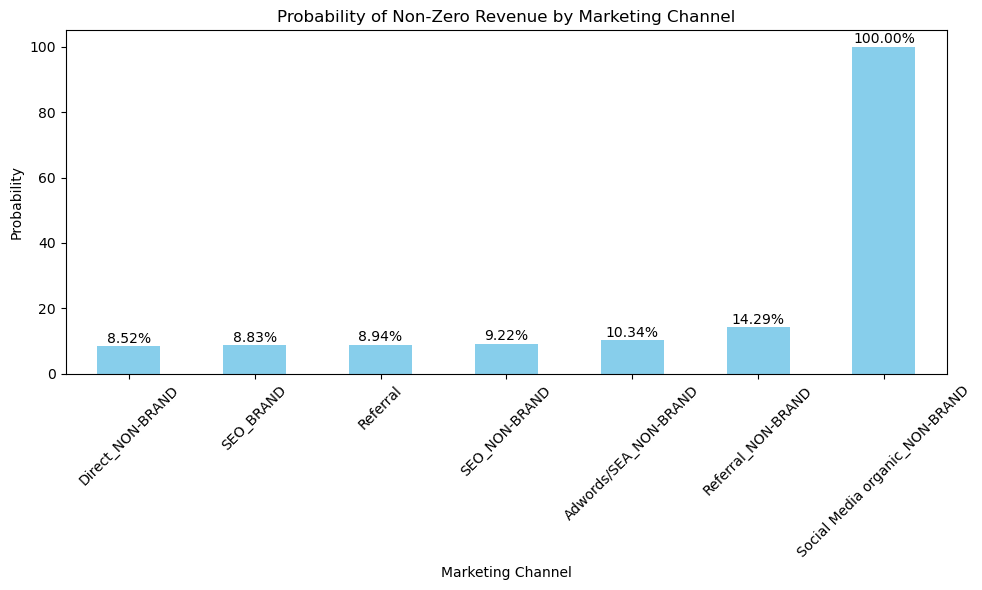

In [203]:
# Plotting the probabilities of non-zero revenue for each marketing channel
plt.figure(figsize=(10, 6))
ax = probability_non_zero_revenue_by_channel.sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Marketing Channel')
plt.ylabel('Probability')
plt.title('Probability of Non-Zero Revenue by Marketing Channel')
plt.xticks(rotation=45)

# Displaying percentages on top of the bars
for i, v in enumerate(probability_non_zero_revenue_by_channel.sort_values()):
    ax.text(i, v + 1, f'{v:.2f}%', color='black', ha='center')

plt.tight_layout()
plt.show()

the above plot presents the probability for a touchpoint to score a revenue by the marketing channel.

In [204]:
# Calculate total revenue assuming each touchpoint generates 1000 euros
total_touchpoints = len(revenue_df)
revenue_per_touchpoint = 1000
total_revenue = total_touchpoints * revenue_per_touchpoint
print(f"Total Revenue: {total_revenue} Euros")

Total Revenue: 1157000 Euros


The total revenue generated from the online marketing is 1157000 Euros.

In [205]:
# Calculate total revenue for each marketing channel assuming each touchpoint generates 1000 euros
revenue_per_touchpoint = 1000
total_revenue_by_channel = revenue_df.groupby('MARKETINGCHANNEL').size() * revenue_per_touchpoint

# Calculate the total revenue across all channels
total_revenue = total_revenue_by_channel.sum()

# Calculate the percentage of total revenue for each marketing channel
percentage_revenue_by_channel = (total_revenue_by_channel / total_revenue) * 100

# Display total revenue and percentage revenue by channel
print("Total Revenue by Channel:")
print(total_revenue_by_channel)
print("\nPercentage of Total Revenue by Channel:")
print(percentage_revenue_by_channel)

Total Revenue by Channel:
MARKETINGCHANNEL
Adwords/SEA_NON-BRAND              15000
Direct_NON-BRAND                  448000
Referral                          189000
Referral_NON-BRAND                  1000
SEO_BRAND                         366000
SEO_NON-BRAND                     137000
Social Media organic_NON-BRAND      1000
dtype: int64

Percentage of Total Revenue by Channel:
MARKETINGCHANNEL
Adwords/SEA_NON-BRAND              1.296456
Direct_NON-BRAND                  38.720830
Referral                          16.335350
Referral_NON-BRAND                 0.086430
SEO_BRAND                         31.633535
SEO_NON-BRAND                     11.840968
Social Media organic_NON-BRAND     0.086430
dtype: float64


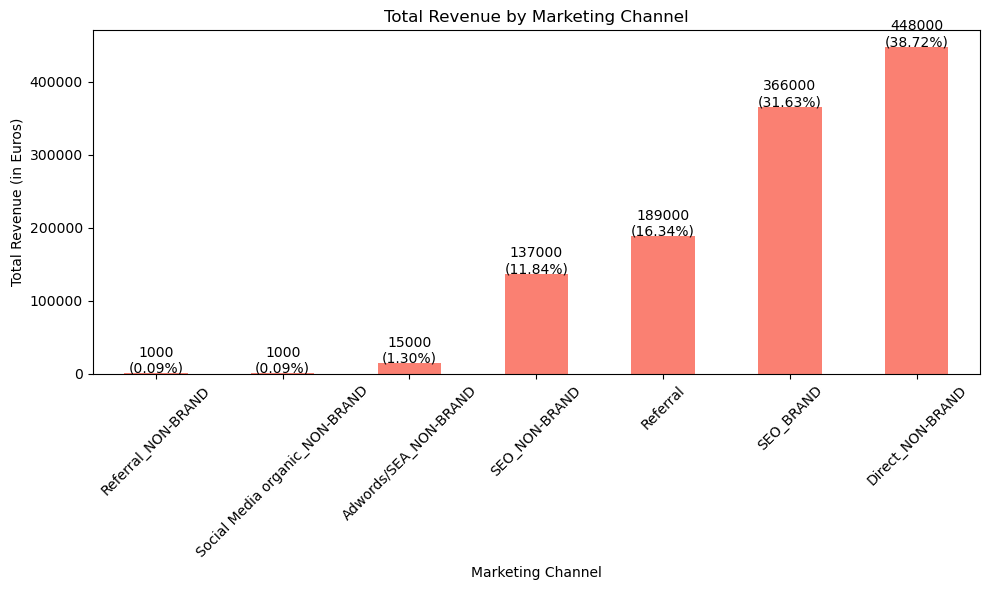

In [206]:
# Plotting the total revenue for each marketing channel
plt.figure(figsize=(10, 6))
ax = total_revenue_by_channel.sort_values().plot(kind='bar', color='salmon')  # Change the color here
plt.xlabel('Marketing Channel')
plt.ylabel('Total Revenue (in Euros)')
plt.title('Total Revenue by Marketing Channel')
plt.xticks(rotation=45)

# Displaying numbers on top of the bars
for i, v in enumerate(total_revenue_by_channel.sort_values()):
    ax.text(i, v + 100, f'{v}\n({(v / total_revenue_by_channel.sum()) * 100:.2f}%)', color='black', ha='center')

plt.tight_layout()
plt.show()

# Additionnal Analysis : Time Period Distribution

In [207]:
df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE,RevenueCategory
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,0,Zero Revenue
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,0,Zero Revenue
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,0,Zero Revenue
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,0,Zero Revenue
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,0,Zero Revenue
...,...,...,...,...,...,...
13299,d0d146c631efb84f,87937035cba9f1b7668dba6ec65c326f72a25139,2019-12-07 15:05:00,Direct_NON-BRAND,0,Zero Revenue
13300,99467aa6cbe3f430,e0cd11c616cd60b452482f8afe1f647116162d25,2020-01-05 18:04:10,SEO_BRAND,0,Zero Revenue
13301,0ae5f29809695ec5,17941cba1edd3dc3913ec3adcadb23e165863dff,2019-12-03 14:24:21,Referral,0,Zero Revenue
13302,3bb38a0777496b70,cc561acd4d2ed7d93f69105e6923e72b852b2e67,2019-12-23 21:18:04,Referral,0,Zero Revenue


In [208]:
revenue_df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,RevenueCategory
0,f0f6f093274df6c7,9ea6ecf003beb7fe5ac1e6fc80cf30abea807ae7,2019-12-05 18:49:57,Referral,Non-Zero Revenue
1,295d74644dc9507f,4703d11b2f26dfe7cabf833dbf7076fedb320690,2020-01-10 12:17:40,SEO_BRAND,Non-Zero Revenue
2,e6d7cbf2d43741db,7a2803d08d68414e7eb36b55f74a60d8246edfb4,2019-11-22 09:57:56,SEO_NON-BRAND,Non-Zero Revenue
3,18f0dc9165b515ae,f0071b6c21e4d0228c26a40bda312dd5ec084f05,2019-12-01 14:30:23,Direct_NON-BRAND,Non-Zero Revenue
4,53b300b2a202bd74,c147df619477656c4d9e662b13ee91244c500409,2019-12-26 20:44:30,SEO_NON-BRAND,Non-Zero Revenue
...,...,...,...,...,...
1152,2afeb33f032d1fbb,93f145d28b3b216eeaf2a55ae63accf00aabba48,2019-12-02 14:38:28,Direct_NON-BRAND,Non-Zero Revenue
1153,35a9351a6fccbf0e,54ef8f6f8e5e8163d83ddb1c0bd2a6309f09e85b,2019-12-16 11:53:49,SEO_BRAND,Non-Zero Revenue
1154,cb360e9270d53475,150b45bce7506da7512f46a961bc3229f35518db,2019-12-27 11:43:14,SEO_BRAND,Non-Zero Revenue
1155,271b10a12e8b77e5,7028447459c49fb7ed23f3d6c654c20b255042f5,2019-12-29 14:31:14,SEO_BRAND,Non-Zero Revenue


In [209]:
# Convert 'TIMESTAMP_TOUCHPOINT' column to datetime format if it's not already in datetime
df['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(df['TIMESTAMP_TOUCHPOINT'])

# Find the earliest and latest dates in the 'TIMESTAMP_TOUCHPOINT' column
earliest_date = df['TIMESTAMP_TOUCHPOINT'].min()
latest_date = df['TIMESTAMP_TOUCHPOINT'].max()

# Display the earliest and latest dates
print("Earliest date in 'TIMESTAMP_TOUCHPOINT' column:", earliest_date)
print("Latest date in 'TIMESTAMP_TOUCHPOINT' column:", latest_date)

Earliest date in 'TIMESTAMP_TOUCHPOINT' column: 2019-11-20 12:24:50
Latest date in 'TIMESTAMP_TOUCHPOINT' column: 2020-01-22 23:55:12


The previous code shows us the earliest timestamp and the latest timestamp of all the touchpoints.
this means that these touchpoints were achieved between 2019-11-20 12:24:50 and 2020-01-22 23:55:12.
That is approximately 2 months.

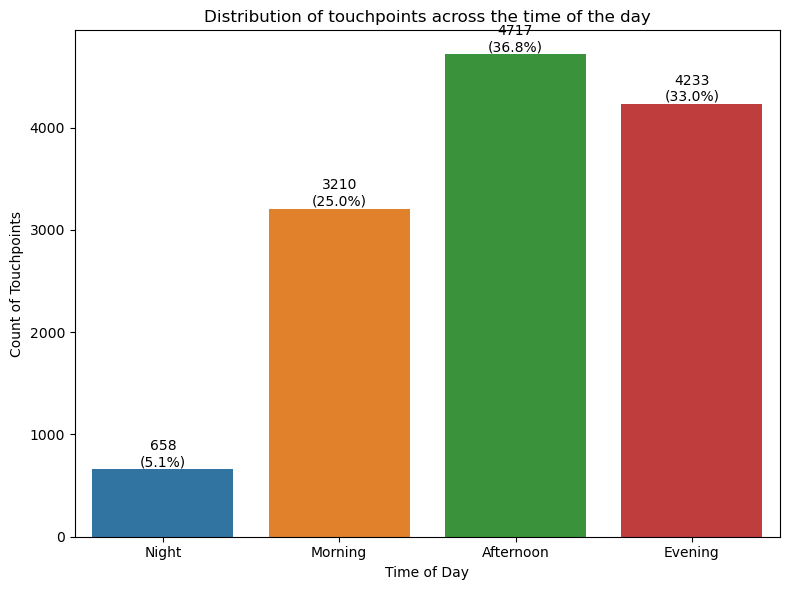

In [210]:
# Convert 'TIMESTAMP_TOUCHPOINT' column to datetime format if needed
df['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(df['TIMESTAMP_TOUCHPOINT'])

# Extract hour from 'TIMESTAMP_TOUCHPOINT' to get time of day
df['Hour'] = df['TIMESTAMP_TOUCHPOINT'].dt.hour

# Assign time categories (Morning, Afternoon, Evening, Night)
time_order = ['Night', 'Morning', 'Afternoon', 'Evening']  # Define the time order
df['TimeCategory'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=time_order, ordered=True)

# Get a count of occurrences for each time category and sort by 'time_order'
time_counts = df['TimeCategory'].value_counts().reindex(time_order)

# Calculate percentages
time_percentages = (time_counts / time_counts.sum()) * 100

# Plot a bar chart for rows across different time categories with count and percentage annotations
plt.figure(figsize=(8, 6))
sns.barplot(x=time_counts.index, y=time_counts.values, order=time_order)
plt.xlabel('Time of Day')
plt.ylabel('Count of Touchpoints')
plt.title('Distribution of touchpoints across the time of the day')

# Display count and percentage values on top of the bars
for i, (count, percent) in enumerate(zip(time_counts, time_percentages)):
    plt.text(i, count + 0.2, f"{count}\n({percent:.1f}%)", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The previous plot shows us the distribution of the touchpoints across times of the day.
We can see that the lowest number of the touchpoints scored are done at night (from 01:00 to 06:59:59 AM) with a score of 658 touchpoint (5.1%).
In the morning, 25% of the touchpoints are scored.
While the highest number of touchpoints are scored in the afternooon and evening. (4717 and 4233 touchpoints respectively and about 70% of all the touchpoints.)

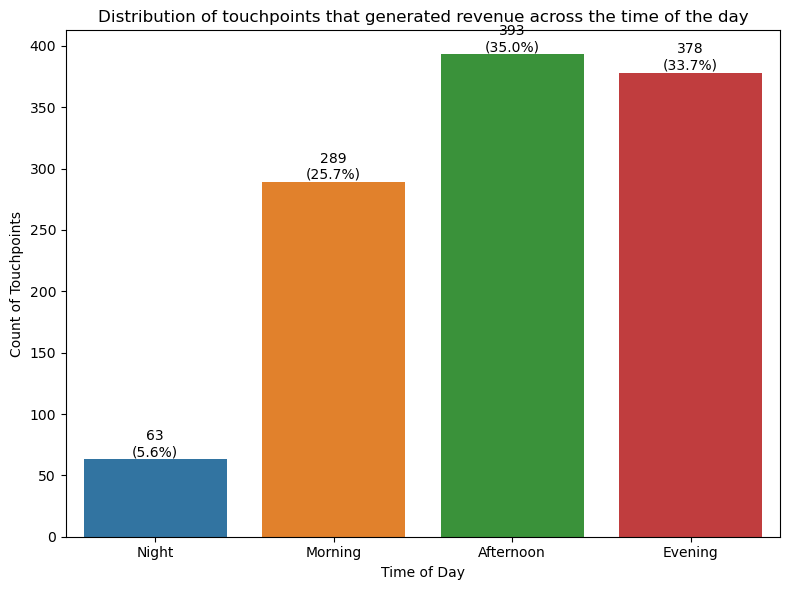

In [211]:
# Convert 'TIMESTAMP_TOUCHPOINT' column to datetime format if needed
revenue_df['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(revenue_df['TIMESTAMP_TOUCHPOINT'])

# Extract hour from 'TIMESTAMP_TOUCHPOINT' to get time of day
revenue_df['Hour'] = revenue_df['TIMESTAMP_TOUCHPOINT'].dt.hour

# Define the time order
time_order = ['Night', 'Morning', 'Afternoon', 'Evening']

# Assign time categories (Morning, Afternoon, Evening, Night)
revenue_df['TimeCategory'] = pd.cut(revenue_df['Hour'], bins=[0, 6, 12, 18, 24], labels=time_order, ordered=True)

# Get a count of occurrences for each time category and sort by 'time_order'
time_counts = revenue_df['TimeCategory'].value_counts().reindex(time_order)

# Calculate percentages
time_percentages = (time_counts / time_counts.sum()) * 100

# Plot a bar chart for rows across different time categories with count and percentage annotations
plt.figure(figsize=(8, 6))
sns.barplot(x=time_counts.index, y=time_counts.values, order=time_order)
plt.xlabel('Time of Day')
plt.ylabel('Count of Touchpoints')
plt.title('Distribution of touchpoints that generated revenue across the time of the day')

# Display count and percentage values on top of the bars
for i, (count, percent) in enumerate(zip(time_counts, time_percentages)):
    plt.text(i, count + 0.2, f"{count}\n({percent:.1f}%)", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

for these two plots also that distributes the number of touchpoints throughout time periods of the day, we see also that the two plots are very similar and the that the percentages are very close.
it is like we are looking at data with magnifying glasses.

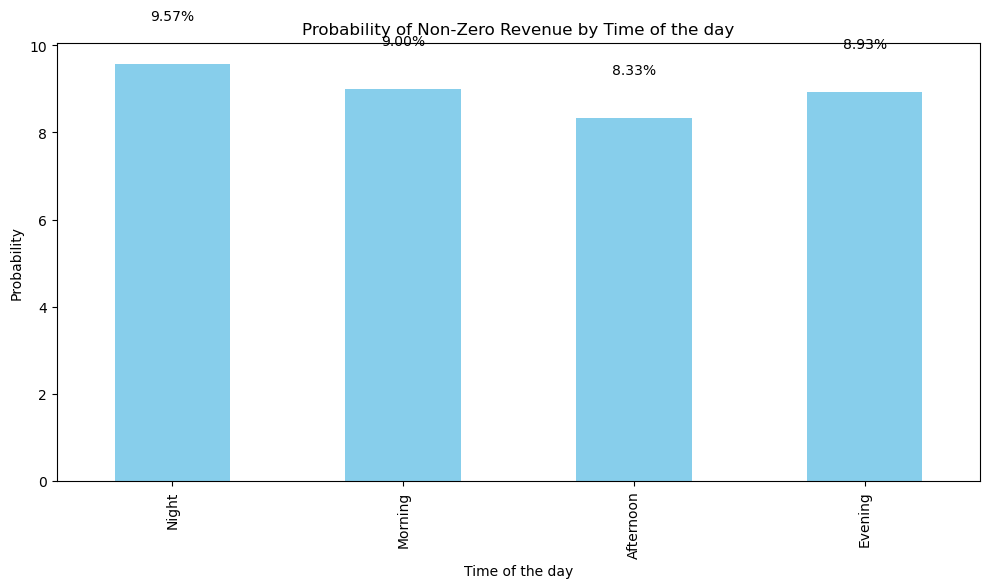

In [212]:
# Filter rows where RevenueCategory is Non-Zero Revenue
revenue_touchpoints = df[df['RevenueCategory'] == 'Non-Zero Revenue']

# Calculate the count of touchpoints for each TimeCategory
time_category_counts = df['TimeCategory'].value_counts()

# Calculate the count of non-zero revenue-generating touchpoints for each TimeCategory
non_zero_revenue_by_time_category = revenue_touchpoints['TimeCategory'].value_counts()

# Calculate the probability of a touchpoint resulting in non-zero revenue for each TimeCategory
probability_non_zero_revenue_by_time_category = (non_zero_revenue_by_time_category / time_category_counts) * 100

# Plotting the probabilities of non-zero revenue for each TimeCategory
plt.figure(figsize=(10, 6))
ax = probability_non_zero_revenue_by_time_category.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Time of the day')
plt.ylabel('Probability')
plt.title('Probability of Non-Zero Revenue by Time of the day')

# Displaying percentages on top of the bars
for i, v in enumerate(probability_non_zero_revenue_by_time_category.sort_index()):
    ax.text(i, v + 1, f'{v:.2f}%', color='black', ha='center')

plt.tight_layout()
plt.show()

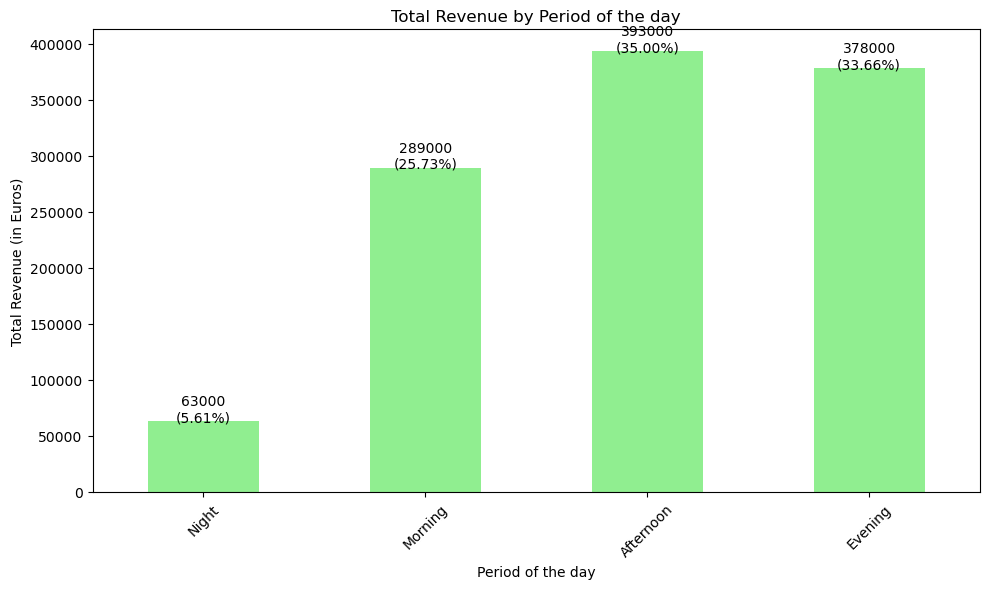

In [213]:
# Calculate total revenue for each time category
total_revenue_by_time_category = revenue_df.groupby('TimeCategory').size() * 1000

# Plotting the total revenue for each time category
plt.figure(figsize=(10, 6))
ax = total_revenue_by_time_category.sort_index().plot(kind='bar', color='lightgreen')  # Change the color here
plt.xlabel('Period of the day')
plt.ylabel('Total Revenue (in Euros)')
plt.title('Total Revenue by Period of the day')

# Displaying numbers on top of the bars
for i, v in enumerate(total_revenue_by_time_category.sort_index()):
    ax.text(i, v + 100, f'{v}\n({(v / total_revenue_by_time_category.sum()) * 100:.2f}%)', color='black', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the above plot represents the revenue by time period.

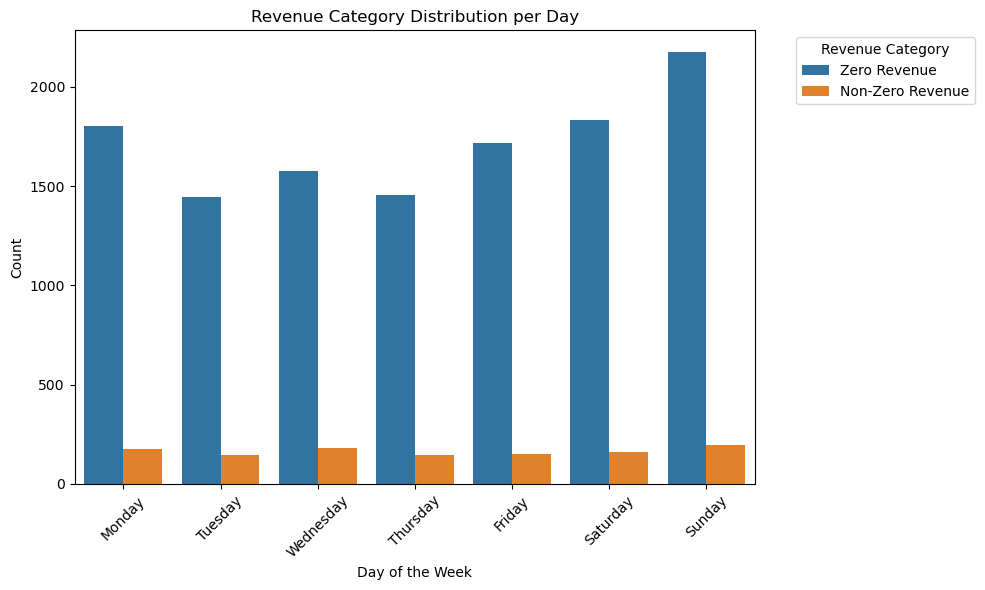

In [224]:
# Convert 'TIMESTAMP_TOUCHPOINT' column to datetime format if needed
df['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(df['TIMESTAMP_TOUCHPOINT'])

# Extract day from 'TIMESTAMP_TOUCHPOINT'
df['Day'] = df['TIMESTAMP_TOUCHPOINT'].dt.day_name()

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate counts and percentages for each day and revenue category
day_revenue_counts = df.groupby(['Day', 'RevenueCategory']).size().unstack().fillna(0)
day_revenue_percentages = (day_revenue_counts.div(day_revenue_counts.sum(axis=1), axis=0) * 100).round(2)

# Plotting the revenue category distribution for each day in the 'df' dataframe
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day', hue='RevenueCategory', order=day_order)

plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Revenue Category Distribution per Day')
plt.legend(title='Revenue Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




The above plot represents the distribution of the two types of touchpoints throughout the days of the week.

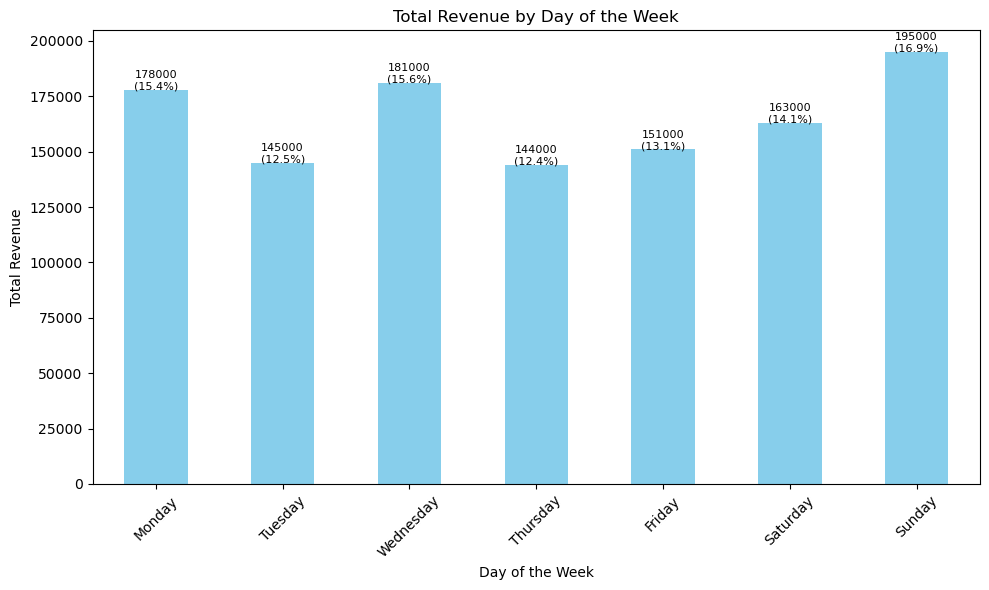

In [225]:
# Convert 'TIMESTAMP_TOUCHPOINT' column to datetime format if needed
revenue_df['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(revenue_df['TIMESTAMP_TOUCHPOINT'])

# Extract day from 'TIMESTAMP_TOUCHPOINT'
revenue_df['Day'] = revenue_df['TIMESTAMP_TOUCHPOINT'].dt.day_name()

# Order days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate total revenue for each day (assuming each row represents 1000 revenue)
total_revenue_by_day = revenue_df.groupby('Day').size().reindex(day_order, fill_value=0) * 1000

# Plotting the total revenue for each day with count and percentage annotations
plt.figure(figsize=(10, 6))
total_revenue_by_day.plot(kind='bar', color='skyblue')

# Display count and percentage values on top of the bars
for i, (day, revenue) in enumerate(total_revenue_by_day.items()):
    plt.text(i, revenue + 1, f"{revenue}\n({(revenue / total_revenue_by_day.sum() * 100):.1f}%)", ha='center', fontsize=8)

plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


From the two above plots, we can see that the most revenue was scored on Sunday.

# interpretation

Total Revenue:

1157000 €

Total Revenue by Channel:
    
Adwords/SEA_NON-BRAND              15000 €
Direct_NON-BRAND                  448000 €
Referral                          189000 €
Referral_NON-BRAND                  1000 €
SEO_BRAND                         366000 €
SEO_NON-BRAND                     137000 €
Social Media organic_NON-BRAND      1000 €

Credit by Channel:

Adwords/SEA_NON-BRAND              1.296456%
Direct_NON-BRAND                  38.720830%
Referral                          16.335350%
Referral_NON-BRAND                 0.086430%
SEO_BRAND                         31.633535%
SEO_NON-BRAND                     11.840968%
Social Media organic_NON-BRAND     0.086430%


In this analysis, the attribution of revenue to marketing channels was performed based on touchpoint counts, using a standard revenue figure of 1000 euros provided by the client. Leveraging concrete data such as this can offer certain advantages by providing a tangible basis for attribution. It facilitates a clear and structured approach to quantify the impact of different touchpoints and aids in making informed decisions. However, these results are subject to limitations due to the fixed revenue assumption. The use of a standardized revenue amount might not accurately reflect the true revenue generated by each touchpoint, potentially leading to imprecise conclusions about channel effectiveness. Moreover, relying solely on touchpoint counts overlooks the intricacies of customer behavior and might not capture the nuances of each channel's contribution to conversions. Exploring additional data sources or employing more sophisticated attribution models could enhance the accuracy and depth of insights, allowing for a more comprehensive understanding of channel performance and their respective limitations.
an example of this, this analysis hints at temporal revenue trends.